In [2]:
!apt-get install default jre

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package jre is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Unable to locate package default
E: Package 'jre' has no installation candidate


In [3]:
!java -version

openjdk version "11.0.14" 2022-01-18
OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [6]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 76 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=2daa107ba7232dec0c01132a1a3e5752605d1bd7fbb4da2316fb7c648c45572f
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


In [27]:
import h2o
from h2o.automl import H2OAutoML

In [9]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmped9rym2c
  JVM stdout: /tmp/tmped9rym2c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmped9rym2c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_88qp2t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [10]:
train = h2o.import_file('https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv')
test = h2o.import_file('https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
train.types

{'response': 'int',
 'x1': 'real',
 'x10': 'real',
 'x11': 'real',
 'x12': 'real',
 'x13': 'real',
 'x14': 'real',
 'x15': 'real',
 'x16': 'real',
 'x17': 'real',
 'x18': 'real',
 'x19': 'real',
 'x2': 'real',
 'x20': 'real',
 'x21': 'real',
 'x22': 'real',
 'x23': 'real',
 'x24': 'real',
 'x25': 'real',
 'x26': 'real',
 'x27': 'real',
 'x28': 'real',
 'x3': 'real',
 'x4': 'real',
 'x5': 'real',
 'x6': 'real',
 'x7': 'real',
 'x8': 'real',
 'x9': 'real'}

In [12]:
train.describe()

Rows:10000
Cols:29




,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.2750626504421234,-2.425236463546753,-1.7425082921981812,0.012355248443782328,-1.7437547445297241,0.15948815643787384,-2.9410083293914795,-1.7412374019622803,0.0,0.189988374710083,-2.910175323486328,-1.7423716783523557,0.0,0.26360762119293213,-2.727842330932617,-1.7420687675476072,0.0,0.36535415053367615,-2.496431827545166,-1.7421357631683347,0.0,0.1722409576177597,0.34246698021888733,0.46118336915969854,0.384410560131073,0.08098646253347397,0.38877949118614197,0.4449557662010193
mean,0.5295,0.9979236403375866,-0.016680663833495056,-0.0034857744504741433,0.991384884365182,-0.009822067860461529,0.9920579565405846,-0.001467795766727788,0.00375094488541365,1.0049390668630596,0.9877106610402461,-0.02098413647862797,-0.00016777858562709325,0.9810776063561439,0.9945834684580565,0.013843917558944673,0.007515283621835988,1.003490788078308,0.97978388197124,0.0012221027551102327,-0.014788587855815416,0.9991417586565018,1.0291478910103435,1.0214554746031757,1.0508769570112235,1.0125336340218782,0.9677125638335939,1.0312243017762897,0.9578644521445038
maxs,1.0,6.695387840270996,2.4299979209899902,1.7432359457015991,5.824007034301758,1.7428184747695923,7.064657211303711,2.9696741104125977,1.741453766822815,2.1730761528015137,5.192512035369873,2.9093241691589355,1.7431747913360596,2.214872121810913,6.523279190063477,2.7272779941558842,1.741774320602417,2.548224449157715,6.067653179168701,2.4955105781555176,1.7428174018859863,3.101961374282837,13.098125457763672,7.3919677734375,3.6822597980499268,6.5831212997436515,8.255083084106445,4.749468803405762,4.3163652420043945
sigma,0.49915394966537796,0.5749652323165785,1.0029429816464288,1.0108375148072333,0.5954604812849598,1.0048276350025853,0.47740822779756953,1.004115085868071,1.0159068205331794,1.0269649157432106,0.4899343832646299,1.0094616478405416,1.005341975081667,1.0456743835345848,0.485816821742571,1.0169739644992715,0.9970667134235768,1.1953415446637299,0.49912682898536187,1.0054594863334045,1.000998115181567,1.3969915502672696,0.6372254799960356,0.36962268165272505,0.16593935483464134,0.40492650011247694,0.523194789843795,0.36622010143683387,0.3133368626304031
zeros,4705,0,0,0,0,0,0,0,0,4870,0,0,0,5093,0,0,0,5688,0,0,0,6468,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,0.869293212890625,-0.6350818276405334,0.22569026052951813,0.327470064163208,-0.6899932026863098,0.7542022466659546,-0.24857313930988315,-1.0920639038085938,0.0,1.3749921321868896,-0.6536741852760315,0.9303491115570068,1.1074360609054565,1.138904333114624,-1.5781983137130735,-1.046985387802124,0.0,0.6579295396804808,-0.010454569943249226,-0.0457671694457531,3.101961374282837,1.353760004043579,0.9795631170272827,0.978076159954071,0.9200048446655273,0.7216574549674988,0.9887509346008301,0.8766783475875854
1,1.0,0.9075421094894409,0.3291472792625427,0.3594118654727936,1.4979698657989502,-0.3130095303058624,1.09553062915802,-0.5575249195098877,-1.5882297754287722,2.1730761528015137,0.8125811815261841,-0.2136419266462326,1.2710145711898804,2.214872121810913,0.4999939501285553,-1.2614318132400513,0.7321561574935913,0.0,0.39870089292526245,-1.138930082321167,-0.0008191101951524615,0.0,0.3022198975086212,0.8330481648445129,0.9856996536254883,0.9780983924865723,0.7797321677207947,0.9923557639122009,0.7983425855636597
2,1.0,0.7988347411155701,1.4706387519836426,-1.6359747648239136,0.45377317070961,0.4256291687488556,1.104874610900879,1.2823222875595093,1.3816642761230469,0.0,0.8517372012138367,1.540658950805664,-0.8196895122528076,2.214872121810913,0.9934899210929871,0.3560801148414612,-0.2087775468826294,2.548224449157715,1.256954550743103,1.128847599029541,0.9004608392715454,0.0,0.9097532629966736,1.108330488204956,0.98569

In [13]:
x = train.columns
y = 'response'
x.remove(y)

In [14]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()


In [15]:
aml = H2OAutoML(max_models=25, seed=1)

In [16]:
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_7_AutoML_1_20220317_112349

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09678283876845113
RMSE: 0.31109940335598707
LogLoss: 0.3419562231935556
Null degrees of freedom: 9999
Residual degrees of freedom: 9981
Null deviance: 13828.113387424315
Residual deviance: 6839.124463871111
AIC: 6877.124463871111
AUC: 0.9714488735287535
AUCPR: 0.9745898039266694
Gini: 0.9428977470575071

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48538457956983344: 


,,0,1,Error,Rate
0,0,4118.0,587.0,0.1248,(587.0/4705.0)
1,1,356.0,4939.0,0.0672,(356.0/5295.0)
2,Total,4474.0,5526.0,0.0943,(943.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.485385,0.912855,215.0
1,max f2,0.406878,0.944473,243.0
2,max f0point5,0.606018,0.926505,168.0
3,max accuracy,0.522304,0.906400,203.0
4,max precision,0.985869,1.000000,0.0
5,max recall,0.202637,1.000000,327.0
6,max specificity,0.985869,1.000000,0.0
7,max absolute_mcc,0.522304,0.812347,203.0
8,max min_per_class_accuracy,0.522304,0.905760,203.0
9,max mean_per_class_accuracy,0.522304,0.906440,203.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.949922,1.888574,1.888574,1.000,0.960882,1.000000,0.960882,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.939872,1.888574,1.888574,1.000,0.945027,1.000000,0.952954,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.931484,1.888574,1.888574,1.000,0.935498,1.000000,0.947136,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.923258,1.888574,1.888574,1.000,0.927452,1.000000,0.942215,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.915615,1.888574,1.888574,1.000,0.919472,1.000000,0.937666,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.882550,1.888574,1.888574,1.000,0.898492,1.000000,0.918079,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.847964,1.888574,1.888574,1.000,0.865455,1.000000,0.900538,0.094429,0.283286,88.857413,88.857413,0.283286
7,8,0.20,0.818156,1.881020,1.886686,0.996,0.833246,0.999000,0.883715,0.094051,0.377337,88.101983,88.668555,0.376912
8,9,0.30,0.744323,1.843248,1.872206,0.976,0.781607,0.991333,0.849679,0.184325,0.561662,84.324835,87.220648,0.556136
9,10,0.40,0.654463,1.746931,1.840888,0.925,0.701286,0.974750,0.812581,0.174693,0.736355,74.693107,84.088763,0.714889




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1861487322480336
RMSE: 0.43144957092113745
LogLoss: 0.5493317757164466
Null degrees of freedom: 9999
Residual degrees of freedom: 9981
Null deviance: 13828.573591958859
Residual deviance: 10986.635514328933
AIC: 11024.635514328933
AUC: 0.7903497876106728
AUCPR: 0.808694494356099
Gini: 0.5806995752213455

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3691838073876687: 


,,0,1,Error,Rate
0,0,2278.0,2427.0,0.5158,(2427.0/4705.0)
1,1,663.0,4632.0,0.1252,(663.0/5295.0)
2,Total,2941.0,7059.0,0.309,(3090.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.369184,0.749879,262.0
1,max f2,0.181700,0.860038,345.0
2,max f0point5,0.618505,0.740810,149.0
3,max accuracy,0.530883,0.713100,187.0
4,max precision,0.983527,1.000000,0.0
5,max recall,0.056351,1.000000,389.0
6,max specificity,0.983527,1.000000,0.0
7,max absolute_mcc,0.560919,0.430614,174.0
8,max min_per_class_accuracy,0.526092,0.711237,189.0
9,max mean_per_class_accuracy,0.560919,0.715302,174.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.938937,1.831917,1.831917,0.970,0.954291,0.970000,0.954291,0.018319,0.018319,83.191690,83.191690,0.017682
1,2,0.02,0.927183,1.888574,1.860246,1.000,0.932508,0.985000,0.943400,0.018886,0.037205,88.857413,86.024551,0.036567
2,3,0.03,0.915738,1.775260,1.831917,0.940,0.920555,0.970000,0.935785,0.017753,0.054958,77.525968,83.191690,0.053045
3,4,0.04,0.906083,1.775260,1.817753,0.940,0.910671,0.962500,0.929506,0.017753,0.072710,77.525968,81.775260,0.069522
4,5,0.05,0.895286,1.737488,1.801700,0.920,0.901373,0.954000,0.923880,0.017375,0.090085,73.748820,80.169972,0.085197
5,6,0.10,0.854566,1.680831,1.741265,0.890,0.875119,0.922000,0.899499,0.084042,0.174127,68.083097,74.126534,0.157548
6,7,0.15,0.814198,1.616619,1.699717,0.856,0.834603,0.900000,0.877867,0.080831,0.254958,61.661945,69.971671,0.223077
7,8,0.20,0.776880,1.586402,1.671388,0.840,0.795656,0.885000,0.857314,0.079320,0.334278,58.640227,67.138810,0.285393
8,9,0.30,0.696440,1.388102,1.576959,0.735,0.736529,0.835000,0.817053,0.138810,0.473088,38.810198,57.695940,0.367881
9,10,0.40,0.618688,1.223796,1.488669,0.648,0.658612,0.788250,0.777442,0.122380,0.595467,22.379603,48.866856,0.415446


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [17]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_7_AutoML_1_20220317_112349,0.79035,0.549332,0.808694,0.320523,0.43145,0.186149
StackedEnsemble_AllModels_4_AutoML_1_20220317_112349,0.790272,0.548966,0.808411,0.318138,0.431506,0.186197
StackedEnsemble_AllModels_3_AutoML_1_20220317_112349,0.790199,0.549095,0.808429,0.314535,0.431525,0.186213
StackedEnsemble_AllModels_2_AutoML_1_20220317_112349,0.788749,0.550446,0.807583,0.329914,0.432228,0.186821
StackedEnsemble_BestOfFamily_5_AutoML_1_20220317_112349,0.788339,0.551031,0.805722,0.326347,0.432383,0.186955
StackedEnsemble_BestOfFamily_8_AutoML_1_20220317_112349,0.788247,0.551371,0.806064,0.330079,0.432426,0.186992
StackedEnsemble_BestOfFamily_4_AutoML_1_20220317_112349,0.788147,0.551268,0.805762,0.318916,0.432475,0.187035
StackedEnsemble_BestOfFamily_3_AutoML_1_20220317_112349,0.787693,0.551602,0.805713,0.320133,0.432675,0.187208
StackedEnsemble_AllModels_1_AutoML_1_20220317_112349,0.787586,0.551652,0.806599,0.330481,0.43277,0.18729
StackedEnsemble_AllModels_6_AutoML_1_20220317_112349,0.786794,0.553546,0.803082,0.320735,0.433234,0.187692


In [22]:
aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.761113,0.238887
0,0.690255,0.309745
0,0.607353,0.392647
1,0.354954,0.645046
0,0.770146,0.229854
1,0.201891,0.798109
1,0.272035,0.727965
0,0.628252,0.371748
1,0.551922,0.448078
0,0.772269,0.227731


In [26]:
model = aml.leader

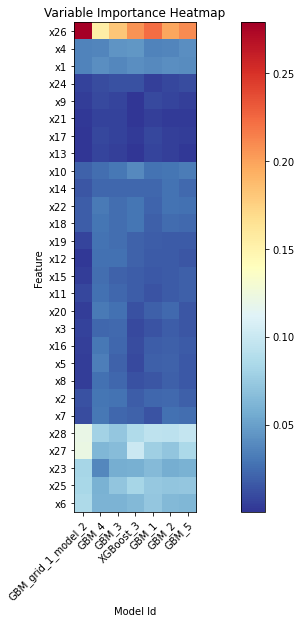

In [31]:
aml.varimp_heatmap()

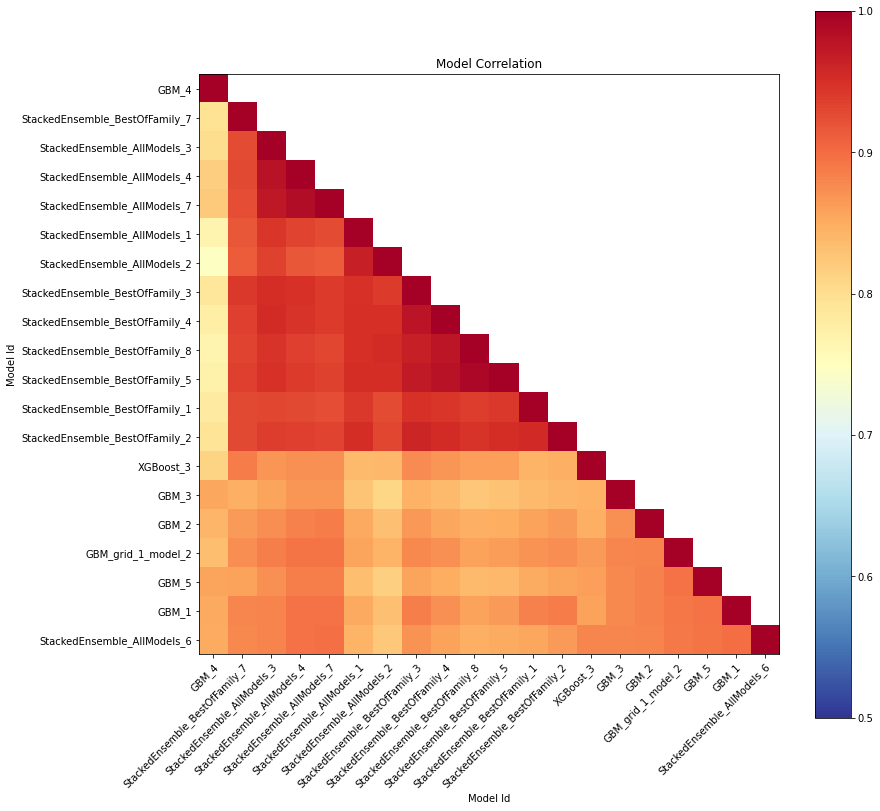

In [32]:
aml.model_correlation_heatmap(test)

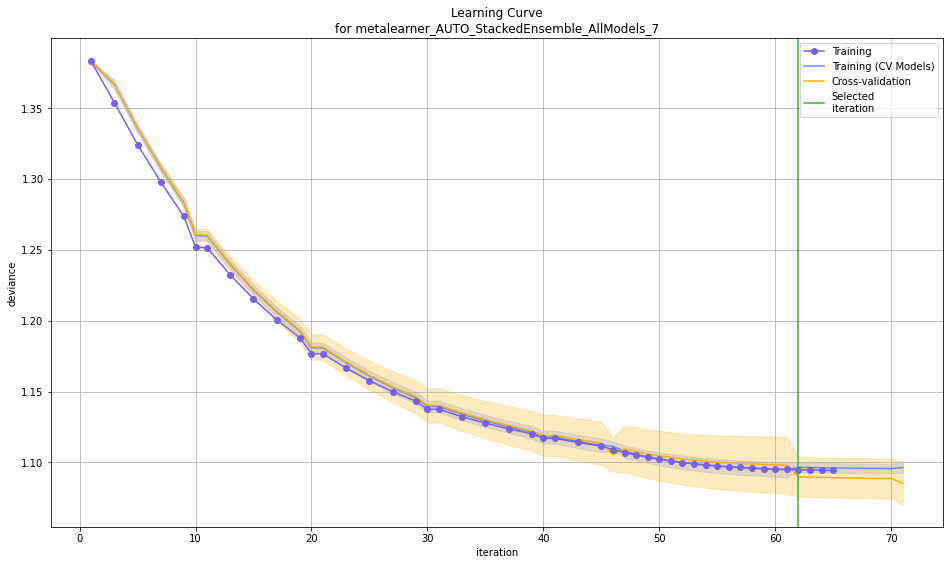

In [34]:
model.learning_curve_plot()